---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [2]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [3]:
def answer_one():
    
    pd.set_option('display.max_columns', None)
    #pd.set_option('display.max_rows', None)
    fdata = pd.read_csv('fraud_data.csv')
    count = fdata.pivot_table(index=['Class'], aggfunc = 'size')
    finst = count[1]/count[0]
    
    return finst
answer_one()

0.016684632328818484

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]

y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X)


             V1        V2        V3        V4        V5        V6        V7  \
0      1.176563  0.323798  0.536927  1.047002 -0.368652 -0.728586  0.084678   
1      0.681109 -3.934776 -3.801827 -1.147468 -0.735540 -0.501097  1.038865   
2      1.140729  0.453484  0.247010  2.383132  0.343287  0.432804  0.093380   
3     -1.107073 -3.298902 -0.184092 -1.795744  2.137564 -1.684992 -2.015606   
4     -0.314818  0.866839 -0.124577 -0.627638  2.651762  3.428128  0.194637   
5     -0.713266  0.869132  0.330114  0.902275  0.520836 -0.537036  0.301955   
6      1.219060 -0.207708  0.782809  0.271655 -0.456658  0.414201 -0.675133   
7      0.683918  0.329216 -1.693025 -1.123644  2.662177  3.563731 -0.309291   
8     -1.127820  1.461342  0.526673 -0.158998  0.353158 -1.539196  0.727383   
9     -1.757794  0.821894  2.529482 -0.328198 -0.902062  0.739803 -0.119755   
10     0.349277 -2.539493  0.645773 -0.503734 -1.792852  0.986512 -0.927262   
11    -0.411810  1.023427  1.264103  0.025506  0.233

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [5]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    #Becuase of answer three, I double checked my answer here and the same issue has occured. (0.9830352203577356, 0.0)
    #Page 276+
    #https://scikit-learn.org/stable/modules/model_evaluation.html
    dc = DummyClassifier().fit(X_train, y_train)
    pred = dc.predict(X_test)
    acs = dc.score(X_train, y_train)
    rs = recall_score(y_test, pred)
    
    return acs, rs
answer_two()

(0.9660704407154711, 0.025000000000000001)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [6]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    #page 101+, 300+
    #https://scikit-learn.org/stable/modules/model_evaluation.html
    #My local jupyter notebook with up to date libraries returned this as a result (0.9897965455774786, 0.35, 0.9333333333333333)
    #So which one is true?
    svc = SVC().fit(X_train, y_train)
    pred = svc.predict(X_test)
    acs = svc.score(X_train, y_train)
    rs = recall_score(y_test, pred)
    ps = precision_score(y_test, pred)
    
    return acs, rs, ps
answer_three()

(0.99784866924826354, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [7]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    #page 120+, 289+, 279+
    #https://scikit-learn.org/stable/modules/model_evaluation.html
    svc = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    decf = svc.decision_function(X_test) > -220
    cm = confusion_matrix(y_test, decf)
    
    return cm
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [12]:
def answer_five():
    #import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
        
    #features needed LogisticRegression, Precision_Recall_Curve, roc_curve, Matplotlib, precision, recall, threshold, fpr, tpr
    #Specifically says 'looking' at the curve, but this data can also be fetched by using the given values
    #Will attempt to try both
    lr = LogisticRegression().fit(X_train, y_train)
    decf = lr.decision_function(X_test)
    pred = lr.predict(X_test)
    precision, recall, threshold = precision_recall_curve(y_test, decf)
    fpr, tpr, _ = roc_curve(y_test, decf)
    
    #plt.figure()
    #plt.plot(precision, recall)
    #plt.plot(fpr, tpr)
    #for x,y in zip(precision, recall):
        #label = 'x = '+'{:f}'.format(x)
        #plt.annotate(label, (x,y), textcoords = 'offset points', xytext = (0,10), ha = 'center')
    #for a,b in zip(fpr, tpr):
        #label = 'a = '+'{:f}'.format(a)
        #plt.annotate(label, (a,b), textcoords = 'offset points', xytext = (0,10), ha = 'center')
    
    #plt.scatter(precision, recall)
    #plt.scatter(fpr, tpr)
    
    #page 289-294 specifically 294
    ans1 = np.argmin(abs(precision - 0.75)) #recall[np.argmin(abs(precision - 0.75))]
    
    #pd.set_option('display.max_rows', None)
    ans2 = np.argmin(abs(fpr - 0.16)) #recall[np.argmin(abs(fpr - 0.16))]
    
    return recall[ans1] , tpr[ans2] #(precision, recall, threshold), (fpr, tpr, _), decf, len
#conclusion: manually searching for the data is more difficult than simply plugging in the values as shown on page 294
answer_five()

(0.82499999999999996, 0.9375)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [13]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    #page 300+
    #https://stackoverflow.com/questions/60868629/valueerror-solver-lbfgs-supports-only-l2-or-none-penalties-got-l1-penalty
    #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    lr = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
    pg = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    lrgrid = GridSearchCV(lr, param_grid = pg, scoring = 'recall')
    lrgrid = lrgrid.fit(X_train, y_train)
    cv = lrgrid.cv_results_
    #This function should return a 5 by 2 numpy array with 10 floats.
    mean = cv['mean_test_score'].reshape(5,2)
    
    return mean
answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

<IPython.core.display.Javascript object>


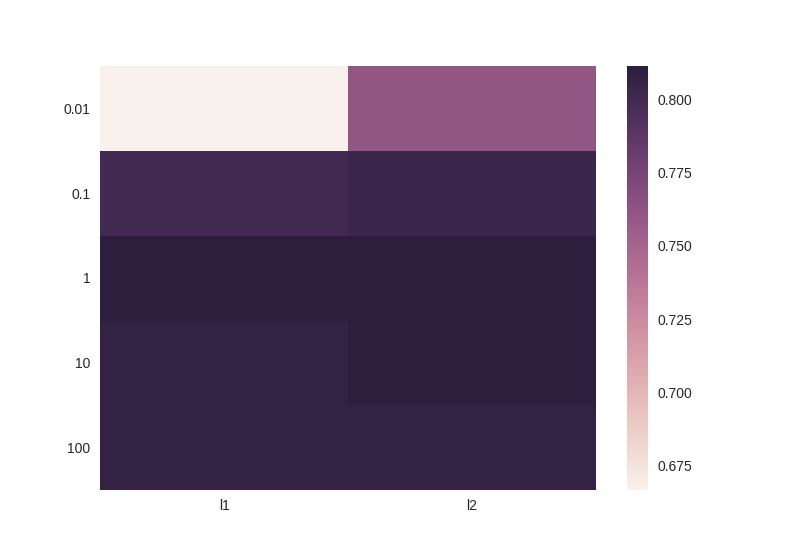

In [10]:
# Use the following function to help visualize results from the grid search
#def GridSearch_Heatmap(scores):
    #%matplotlib notebook
    #import seaborn as sns
    #import matplotlib.pyplot as plt
    #plt.figure()
    #sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    #plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())